In [1]:
import sys
import aa_py
%matplotlib inline
%load_ext autoreload
%autoreload 2
sys.path.append('../')
sys.path.append('../../torques/')
from orbit import *
import json

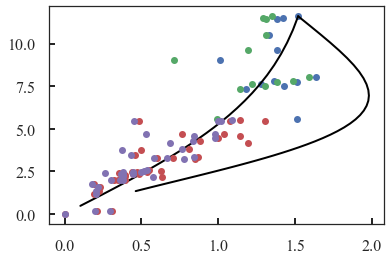

In [61]:
from transform_penarrubia import half_mass_radius
rh_k = np.array([half_mass_radius(rc,c) for rc,c in zip(data['r_core'],data['c_king'])[:13]])
rh_p = data['r_half'][:13]
sp = data['sig_proj'][:13]
plt.plot(rh_k,sp,'.')
plt.plot(rh_p,sp,'.')
plt.plot(penarrubia_tracks_Mh(xx)[1]*rh_k[0],penarrubia_tracks_Mh(xx)[0]*sp[0],color='k')
xx = np.logspace(-3.,0.)
plt.plot(penarrubia_tracks_Mh_adjusted(xx)[1]*rh_k[0],penarrubia_tracks_Mh_adjusted(xx)[0]*sp[0],color='k')
rh_k = np.array([half_mass_radius(rc,c) for rc,c in zip(data['r_core'],data['c_king'])[14:]])
rh_p = data['r_half'][14:]
sp = data['sig_proj'][14:]
plt.plot(rh_k,sp,'.')
plt.plot(rh_p,sp,'.')

In [2]:
from run_2comp_cluster_vmaxuniversal import generate_simproperties
s, pmmag, ca = 1., 0.1, 1.0
simprops = generate_simproperties(SegregationParameter=s, propermotionmag=pmmag, flattening=ca,
                                 Nparticles=4e5)

eq = crater2_eq()
solar_reflex = crater2_solarreflex()
pm = np.array([pmmag,0.])+solar_reflex
Eq = np.array([eq[0],eq[1],distance,vlos,pm[0],pm[1]])

# info = json.load(open('/data/jls/m2m/CraterII/fixed_veldisp_10_c20/2comp_cuspplum_nfw_SP_2_PM_-18_-14_ca_10.simlog'))

rs_nfw=simprops['Rscale']
c = simprops['c']
Delta=simprops['Delta']
from nbody_tools import Mvir_NFW, Vmax_NFW

print Mvir_NFW(rs_nfw,c,Delta=Delta)/3.7e9
print Vmax_NFW(rs_nfw,c,Delta=Delta)

R,T = integrate_orbits_backwards(Eq)

print pericentre(R),apocentre(R),count_pericentres(R)
print tidal_radius(pericentre(R),rs_nfw,c=c,Delta=Delta)
print tidal_radius(apocentre(R),rs_nfw,c=c,Delta=Delta)
print mass_loss(pericentre(R),apocentre(R),1,rs_nfw,c=c,Delta=Delta)
print mass_loss_hayashi(pericentre(R),apocentre(R),1,rs_nfw,c=c,Delta=Delta)
print penarrubia_tracks(mass_loss(pericentre(R),apocentre(R),1,rs_nfw,c=c,Delta=Delta))[0]
print period(R,T)

data = pd.read_csv('/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%i_PM_%i_ca_10_properties.csv'%(int(s),int(pmmag*100.)))
# print 'PROBLEM WITH DATAFLAT'
# data_flat = data.copy()
data_flat = pd.read_csv('/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%i_PM_%i_ca_03_properties.csv'%(int(s),int(pmmag*100.)))

Scale radius = 1.45
Softening = 0.05157150081844565
[-102.3714935   -46.16622771   67.61404953    4.58179312  -36.16510952
  -26.53893727]
Tidal radius =  9.28130148139
Time unit:  0.17742722461994398
Mass fraction inside r_s =  0.1992992945913107
400000.0
Velocity dispersion =  11.16146451814327
0.178706332835
0.356132538035
20.097972779767034
12.993369728898584 131.13196505652292 7
0.635587156247
9.28480806695
0.051657511774053644
0.051657511774053644
0.22728288931209414
1.7931211701458736


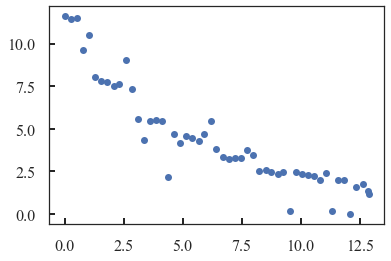

In [3]:
plt.plot(data['times'],data['sig_proj'],'.')

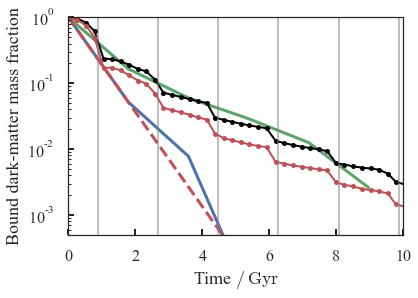

In [3]:
Red = sns.color_palette()[2]
round_kwargs = {'ls':'solid','marker':'o','color':'k','ms':5}
flat_kwargs = {'ls':'solid','marker':'o','color':Red,'ms':5}
nn=np.arange(7)
plt.plot(nn*period(R,T),[mass_loss_hayashi(pericentre(R),apocentre(R),NN,rs_nfw,c=c,Delta=Delta,rlim=0.03*rs_nfw) 
             for NN in nn],lw=3)
plt.plot(nn*period(R,T),[mass_loss_hayashi(pericentre(R)*1.8,apocentre(R),NN,rs_nfw,c=c,Delta=Delta,rlim=0.03*rs_nfw) 
             for NN in nn],lw=3)
plt.plot(nn*period(R,T),[mass_loss(pericentre(R),apocentre(R),NN,rs_nfw,c=c,
                                   Delta=Delta) for NN in nn],ls='dashed',lw=3)
plt.ylim(5e-4,1.)
plt.semilogy()
mbnd = mass_loss_hayashi(pericentre(R),apocentre(R),count_pericentres(R),
                         rs_nfw,c=c,Delta=Delta,rlim=0.03*rs_nfw)
plt.plot(data['times'],data['mass_dm']/data['mass_dm'][0],**round_kwargs);plt.semilogy()
plt.plot(data_flat['times'],data_flat['mass_dm']/data_flat['mass_dm'][0],**flat_kwargs);plt.semilogy()
plt.xlim(0.,10.)
[plt.axvline((P+.5)*period(R,T),color='gray',alpha=0.5) for P in range(count_pericentres(R))]
plt.ylabel(r'Bound dark-matter mass fraction')
plt.xlabel(r'Time $/\,\mathrm{Gyr}$')

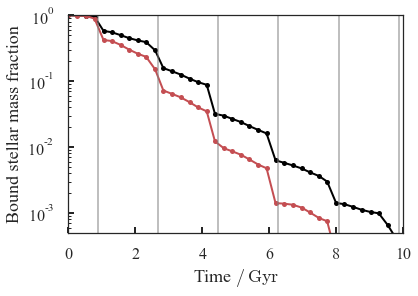

In [4]:
Red = sns.color_palette()[2]
round_kwargs = {'ls':'solid','marker':'o','color':'k','ms':5}
flat_kwargs = {'ls':'solid','marker':'o','color':Red,'ms':5}
nn=np.arange(7)
# plt.plot(nn*period(R,T),[mass_loss_hayashi(pericentre(R),apocentre(R),NN,rs_nfw,c=c,Delta=Delta,rlim=0.03*rs_nfw) 
#              for NN in nn],lw=3)
# plt.plot(nn*period(R,T),[mass_loss(pericentre(R),apocentre(R),NN,rs_nfw,c=c,
#                                    Delta=Delta) for NN in nn],ls='dashed',lw=3)
plt.ylim(5e-4,1.)
plt.semilogy()
mbnd = mass_loss_hayashi(pericentre(R),apocentre(R),count_pericentres(R),
                         rs_nfw,c=c,Delta=Delta,rlim=0.03*rs_nfw)
plt.plot(data['times'],data['mass_st']/data['mass_st'][0],**round_kwargs);plt.semilogy()
plt.plot(data_flat['times'],data_flat['mass_st']/data_flat['mass_st'][0],**flat_kwargs);plt.semilogy()
plt.xlim(0.,10.)
[plt.axvline((P+.5)*period(R,T),color='gray',alpha=0.5) for P in range(count_pericentres(R))]
plt.ylabel(r'Bound stellar mass fraction')
plt.xlabel(r'Time $/\,\mathrm{Gyr}$')

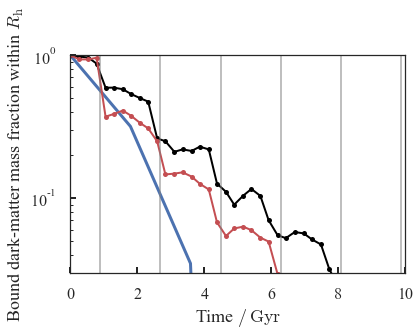

In [5]:
Red = sns.color_palette()[2]
round_kwargs = {'ls':'solid','marker':'o','color':'k','ms':5}
flat_kwargs = {'ls':'solid','marker':'o','color':Red,'ms':5}
nn=np.arange(7)
plt.plot(nn*period(R,T),[mass_loss_hayashi(pericentre(R),apocentre(R),NN,rs_nfw,
                                           c=c,Delta=Delta,rlim=0.03*rs_nfw,rtotal=simprops['rs']) 
             for NN in nn],lw=3)
# plt.plot(nn*period(R,T),[mass_loss(pericentre(R),apocentre(R),NN,rs_nfw,c=c,
#                                    Delta=Delta) for NN in nn],ls='dashed',lw=3)
plt.ylim(0.03,1.)
plt.semilogy()
mbnd = mass_loss_hayashi(pericentre(R),apocentre(R),count_pericentres(R),
                         rs_nfw,c=c,Delta=Delta,rlim=0.03*rs_nfw)
plt.plot(data['times'],data['mass_dm_core']/data['mass_dm_core'][0],**round_kwargs);plt.semilogy()
plt.plot(data_flat['times'],data_flat['mass_dm_core']/data_flat['mass_dm_core'][0],**flat_kwargs);plt.semilogy()
plt.xlim(0.,10.)
[plt.axvline((P+.5)*period(R,T),color='gray',alpha=0.5) for P in range(count_pericentres(R))]
plt.ylabel(r'Bound dark-matter mass fraction within $R_\mathrm{h}$')
plt.xlabel(r'Time $/\,\mathrm{Gyr}$')

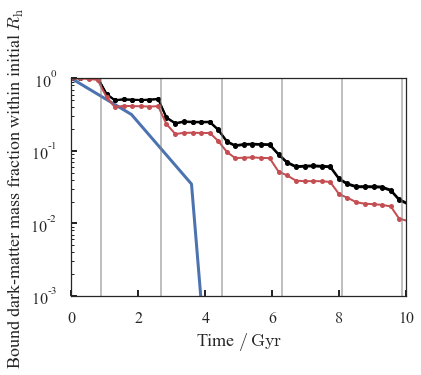

In [8]:
Red = sns.color_palette()[2]
round_kwargs = {'ls':'solid','marker':'o','color':'k','ms':5}
flat_kwargs = {'ls':'solid','marker':'o','color':Red,'ms':5}
nn=np.arange(7)
plt.plot(nn*period(R,T),[mass_loss_hayashi(pericentre(R),apocentre(R),NN,rs_nfw,
                                           c=c,Delta=Delta,rlim=0.03*rs_nfw,rtotal=simprops['rs']) 
             for NN in nn],lw=3)
# plt.plot(nn*period(R,T),[mass_loss(pericentre(R),apocentre(R),NN,rs_nfw,c=c,
#                                    Delta=Delta) for NN in nn],ls='dashed',lw=3)
plt.ylim(1e-3,1.)
plt.semilogy()
mbnd = mass_loss_hayashi(pericentre(R),apocentre(R),count_pericentres(R),
                         rs_nfw,c=c,Delta=Delta,rlim=0.03*rs_nfw)
plt.plot(data['times'],data['mass_dm_core_init']/data['mass_dm_core_init'][0],**round_kwargs);plt.semilogy()
plt.plot(data['times'],
         (data['mass_dm_core_init']+data['mass_st_core_init'])/(data['mass_dm_core_init']+data['mass_st_core_init'])[0],
         **round_kwargs);plt.semilogy()
plt.plot(data_flat['times'],data_flat['mass_dm_core_init']/data_flat['mass_dm_core_init'][0],**flat_kwargs);plt.semilogy()
plt.xlim(0.,10.)
[plt.axvline((P+.5)*period(R,T),color='gray',alpha=0.5) for P in range(count_pericentres(R))]
plt.ylabel(r'Bound dark-matter mass fraction within initial $R_\mathrm{h}$')
plt.xlabel(r'Time $/\,\mathrm{Gyr}$')

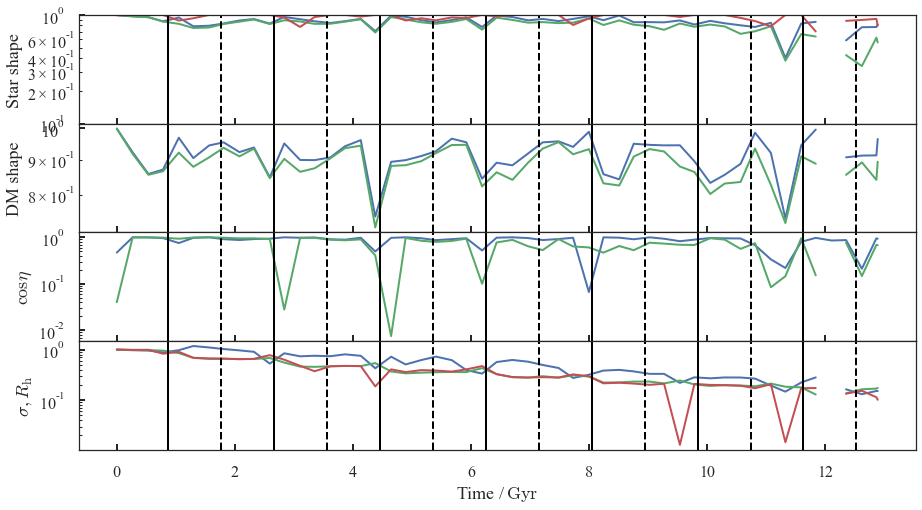

In [9]:
f,a=plt.subplots(4,1,figsize=[15.,8.])
plt.subplots_adjust(hspace=0.)
plt.sca(a[0])
plt.plot(data['times'],data['ba_st']);plt.semilogy()
plt.plot(data['times'],data['ca_st']);plt.semilogy()
plt.plot(data['times'],1.-data['eps']);plt.semilogy()
plt.ylabel('Star shape')
plt.ylim(0.1,1.)
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.sca(a[1])
plt.plot(data['times'],data['ba_dm']);plt.semilogy()
plt.plot(data['times'],data['ca_dm']);plt.semilogy()
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.ylabel('DM shape')
plt.sca(a[2])
plt.plot(data['times'],data['align_dm']);plt.semilogy()
plt.plot(data['times'],data['align_st']);plt.semilogy()
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.ylabel(r'$\cos\eta$')
plt.sca(a[3])
plt.plot(data['times'],data['r_half']/data['r_half'][0]);plt.semilogy()
plt.plot(data['times'],data['sig_maj']/data['sig_maj'][0]);plt.semilogy()
plt.plot(data['times'],data['sig_proj']/data['sig_proj'][0]);plt.semilogy()
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.ylabel(r'$\sigma,R_\mathrm{h}$')
plt.xlabel(r'Time /$\,\mathrm{Gyr}$')
# plt.savefig('pmmag_10_properties_time.pdf',bbox_inches='tight')

(0.013044948696654082, 2.0)

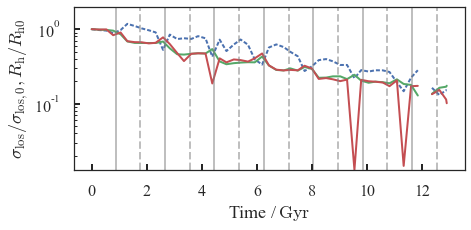

In [20]:
f,a=plt.subplots(figsize=[7.,3.])
l,=plt.plot(data['times'],data['r_half']/data['r_half'][0],lw=2,ls='dashed');
l.set_dashes((2,1))
plt.plot(data['times'],data['sig_maj']/data['sig_maj'][0],lw=2);
plt.plot(data['times'],data['sig_proj']/data['sig_proj'][0],lw=2);
plt.semilogy()
[plt.axvline(v,color='gray',alpha=0.5) for v in peri_times(R,T)]
[plt.axvline(v,color='gray',ls='dashed',alpha=0.5) for v in apo_times(R,T)];
plt.ylabel(r'$\sigma_\mathrm{los}/\sigma_\mathrm{los,0},R_\mathrm{h}/R_\mathrm{h0}$')
plt.xlabel(r'Time /$\,\mathrm{Gyr}$')
plt.ylim(0.,2.)
# plt.savefig('pmmag_10_beating.pdf',bbox_inches='tight')

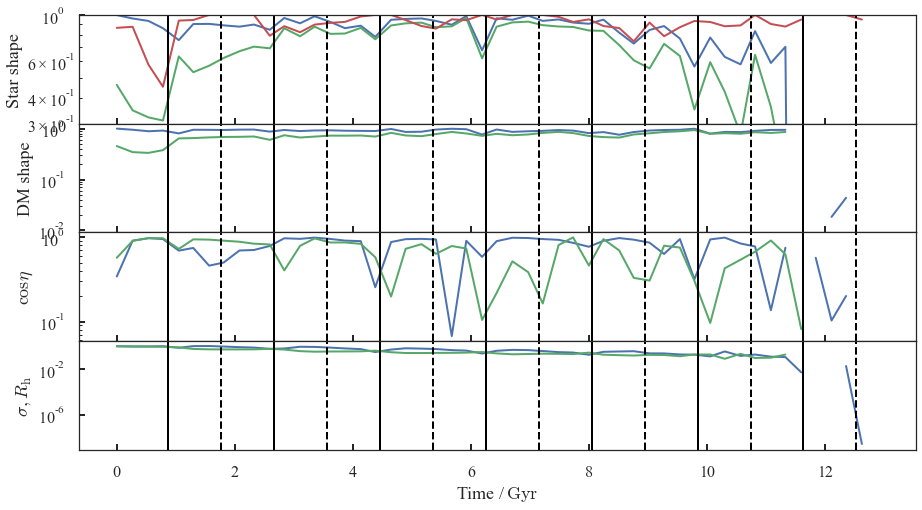

In [11]:
f,a=plt.subplots(4,1,figsize=[15.,8.])
plt.subplots_adjust(hspace=0.)
plt.sca(a[0])
plt.plot(data_flat['times'],data_flat['ba_st']);plt.semilogy()
plt.plot(data_flat['times'],data_flat['ca_st']);plt.semilogy()
plt.plot(data_flat['times'],1.-data_flat['eps']);plt.semilogy()
plt.ylabel('Star shape')
plt.ylim(0.3,1.)
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.sca(a[1])
plt.plot(data_flat['times'],data_flat['ba_dm']);plt.semilogy()
plt.plot(data_flat['times'],data_flat['ca_dm']);plt.semilogy()
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.ylabel('DM shape')
plt.sca(a[2])
plt.plot(data_flat['times'],data_flat['align_dm']);plt.semilogy()
plt.plot(data_flat['times'],data_flat['align_st']);plt.semilogy()
plt.ylabel(r'$\cos\eta$')
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.sca(a[3])
plt.plot(data_flat['times'],data_flat['r_half']/data_flat['r_half'][0]);plt.semilogy()
plt.plot(data_flat['times'],data_flat['sig_maj']/data_flat['sig_maj'][0]);plt.semilogy()
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.ylabel(r'$\sigma,R_\mathrm{h}$')
plt.xlabel(r'Time /$\,\mathrm{Gyr}$')

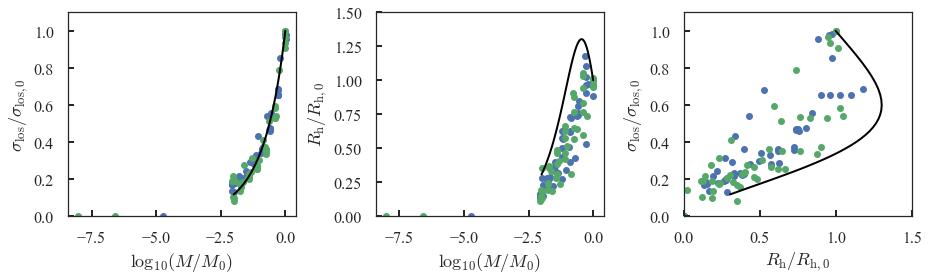

In [12]:
f,a=plt.subplots(1,3,figsize=[13.,4.])
plt.sca(a[0])
plt.plot(np.log10(data['mass_dm_core_init']/data['mass_dm_core_init'][0]),data['sig_maj']/data['sig_maj'][0],'.')
plt.plot(np.log10(data_flat['mass_dm_core_init']/data_flat['mass_dm_core_init'][0]),
         data_flat['sig_maj']/data_flat['sig_maj'][0],'.')
plt.xlabel(r'$\log_{10}(M/M_\mathrm{0})$')
plt.ylabel(r'$\sigma_\mathrm{los}/\sigma_\mathrm{los,0}$')
xx = np.logspace(-2.,0.)
plt.ylim(0.,1.1)
plt.plot(np.log10(xx),penarrubia_tracks_Mh(xx)[0],color='k')
plt.sca(a[1])
plt.plot(np.log10(data['mass_dm_core_init']/data['mass_dm_core_init'][0]),data['r_half']/data['r_half'][0],'.')
plt.plot(np.log10(data['mass_dm_core_init']/data['mass_dm_core_init'][0]),data['r_half']/data['r_half'][0],'.')
plt.plot(np.log10(data_flat['mass_dm_core_init']/data_flat['mass_dm_core_init'][0]),
         data_flat['r_half']/data_flat['r_half'][0],'.')
xx = np.logspace(-2.,0.)
plt.ylim(0.,1.5)
plt.plot(np.log10(xx),penarrubia_tracks_Mh(xx)[1],color='k')
plt.xlabel(r'$\log_{10}(M/M_\mathrm{0})$')
plt.ylabel(r'$R_\mathrm{h}/R_\mathrm{h,0}$')
plt.sca(a[2])
plt.plot(data['r_half']/data['r_half'][0],data['sig_maj']/data['sig_maj'][0],'.')
plt.plot(data_flat['r_half']/data_flat['r_half'][0],data_flat['sig_maj']/data_flat['sig_maj'][0],'.')
plt.plot(penarrubia_tracks_Mh(xx)[1],penarrubia_tracks_Mh(xx)[0],color='k')
plt.xlabel(r'$R_\mathrm{h}/R_\mathrm{h,0}$')
plt.ylabel(r'$\sigma_\mathrm{los}/\sigma_\mathrm{los,0}$')
plt.xlim(0.,1.5)
plt.ylim(0.,1.1)
plt.tight_layout()

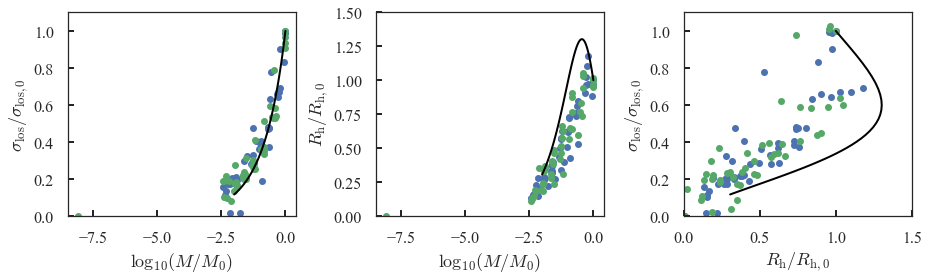

In [19]:
f,a=plt.subplots(1,3,figsize=[13.,4.])
plt.sca(a[0])
plt.plot(np.log10(data['mass_dm_core']/data['mass_dm_core'][0]),data['sig_proj']/data['sig_proj'][0],'.')
plt.plot(np.log10(data_flat['mass_dm_core']/data_flat['mass_dm_core'][0]),
         data_flat['sig_maj']/data_flat['sig_maj'][0],'.')
plt.xlabel(r'$\log_{10}(M/M_\mathrm{0})$')
plt.ylabel(r'$\sigma_\mathrm{los}/\sigma_\mathrm{los,0}$')
xx = np.logspace(-2.,0.)
plt.ylim(0.,1.1)
plt.plot(np.log10(xx),penarrubia_tracks_Mh(xx)[0],color='k')
plt.sca(a[1])
plt.plot(np.log10(data['mass_dm_core']/data['mass_dm_core'][0]),data['r_half']/data['r_half'][0],'.')
plt.plot(np.log10(data_flat['mass_dm_core']/data_flat['mass_dm_core'][0]),
         data_flat['r_half']/data_flat['r_half'][0],'.')
xx = np.logspace(-2.,0.)
plt.ylim(0.,1.5)
plt.plot(np.log10(xx),penarrubia_tracks_Mh(xx)[1],color='k')
plt.xlabel(r'$\log_{10}(M/M_\mathrm{0})$')
plt.ylabel(r'$R_\mathrm{h}/R_\mathrm{h,0}$')
plt.sca(a[2])
plt.plot(data['r_half']/data['r_half'][0],data['sig_proj']/data['sig_proj'][0],'.')
plt.plot(data_flat['r_half']/data_flat['r_half'][0],data_flat['sig_proj']/data_flat['sig_proj'][0],'.')
plt.plot(penarrubia_tracks_Mh(xx)[1],penarrubia_tracks_Mh(xx)[0],color='k')
plt.xlabel(r'$R_\mathrm{h}/R_\mathrm{h,0}$')
plt.ylabel(r'$\sigma_\mathrm{los}/\sigma_\mathrm{los,0}$')
plt.xlim(0.,1.5)
plt.ylim(0.,1.1)
plt.tight_layout()

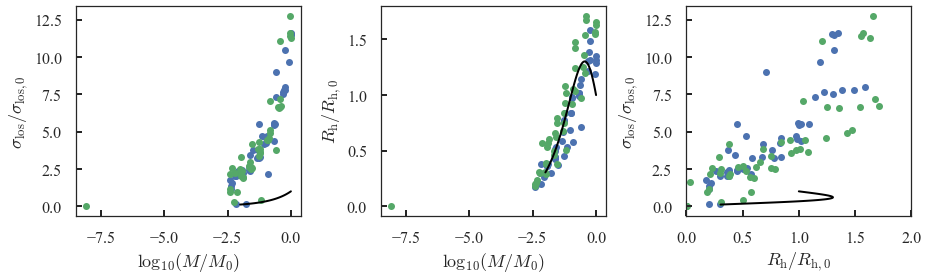

In [14]:
f,a=plt.subplots(1,3,figsize=[13.,4.])
plt.sca(a[0])
plt.plot(np.log10(data['mass_dm_core']/data['mass_dm_core'][0]),data['sig_proj'],'.')
plt.plot(np.log10(data_flat['mass_dm_core']/data_flat['mass_dm_core'][0]),
         data_flat['sig_proj'],'.')
plt.xlabel(r'$\log_{10}(M/M_\mathrm{0})$')
plt.ylabel(r'$\sigma_\mathrm{los}/\sigma_\mathrm{los,0}$')
xx = np.logspace(-2.,0.)
# plt.ylim(0.,1.1)
plt.plot(np.log10(xx),penarrubia_tracks_Mh(xx)[0],color='k')
plt.sca(a[1])
plt.plot(np.log10(data['mass_dm_core']/data['mass_dm_core'][0]),data['r_half'],'.')
plt.plot(np.log10(data_flat['mass_dm_core']/data_flat['mass_dm_core'][0]),
         data_flat['r_half'],'.')
xx = np.logspace(-2.,0.)
# plt.ylim(0.,1.4)
plt.plot(np.log10(xx),penarrubia_tracks_Mh(xx)[1],color='k')
plt.xlabel(r'$\log_{10}(M/M_\mathrm{0})$')
plt.ylabel(r'$R_\mathrm{h}/R_\mathrm{h,0}$')
plt.sca(a[2])
plt.plot(data['r_half'],data['sig_proj'],'.')
plt.plot(data_flat['r_half'],data_flat['sig_proj'],'.')
plt.plot(penarrubia_tracks_Mh(xx)[1],penarrubia_tracks_Mh(xx)[0],color='k')
plt.xlabel(r'$R_\mathrm{h}/R_\mathrm{h,0}$')
plt.ylabel(r'$\sigma_\mathrm{los}/\sigma_\mathrm{los,0}$')
plt.xlim(0.,2.)
plt.tight_layout()

## Rh

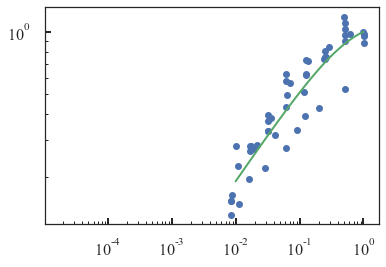

In [60]:
plt.plot(data['mass_dm_core_init']/data['mass_dm_core_init'][0],
         data['r_half']/data['r_half'][0],'.')
plt.semilogx()
plt.semilogy()

xx = np.logspace(-2.,0.)
alpha,beta=0.6,0.45
plt.plot(xx,2.**alpha*xx**beta/(1.+xx)**alpha)

## Mass-to-light

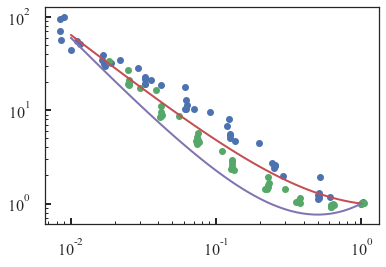

In [15]:
plt.plot(data['mass_dm_core_init']/data['mass_dm_core_init'][0],
         data['mass_dm_core']/data['mass_st_core']/(data['mass_dm_core']/data['mass_st_core'])[0],'.')
plt.semilogx()
plt.semilogy()


dddata = pd.read_csv('/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_2_PM_10_ca_10_properties.csv')
plt.plot(dddata['mass_dm_core_init']/dddata['mass_dm_core_init'][0],
         dddata['mass_dm_core']/dddata['mass_st_core']/(dddata['mass_dm_core']/(dddata['mass_st_core']))[0],'.')

xx = np.logspace(-2.,0.)
alpha,beta=-2.,-1.2
plt.plot(xx,2.**alpha*xx**beta/(1.+xx)**alpha)
alpha,beta=-4.8,-1.6
plt.plot(xx,2.**alpha*xx**beta/(1.+xx)**alpha)

## Stellar luminosity

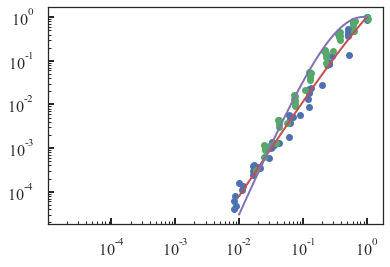

In [16]:
plt.plot(data['mass_dm_core_init']/data['mass_dm_core_init'][0],
         data['mass_st_core']/data['mass_st_core'][0],'.')
plt.semilogx()
plt.semilogy()


dddata = pd.read_csv('/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_2_PM_10_ca_10_properties.csv')
plt.plot(dddata['mass_dm_core_init']/dddata['mass_dm_core_init'][0],
         dddata['mass_st_core']/dddata['mass_st_core'][0],'.')

xx = np.logspace(-2.,0.)
alpha,beta=1.,2.2
plt.plot(xx,2.**alpha*xx**beta/(1.+xx)**alpha)
alpha,beta=7.,3.3
plt.plot(xx,2.**alpha*xx**beta/(1.+xx)**alpha)

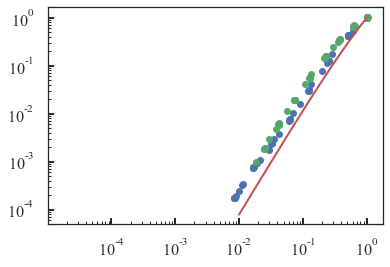

In [17]:
plt.plot(data['mass_dm_core_init']/data['mass_dm_core_init'][0],
         data['mass_st_core_init']/data['mass_st_core_init'][0],'.')
plt.semilogx()
plt.semilogy()


dddata = pd.read_csv('/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_2_PM_10_ca_10_properties.csv')
plt.plot(dddata['mass_dm_core_init']/dddata['mass_dm_core_init'][0],
         dddata['mass_st_core_init']/dddata['mass_st_core_init'][0],'.')

xx = np.logspace(-2.,0.)
alpha,beta=1.,2.2
plt.plot(xx,2.**alpha*xx**beta/(1.+xx)**alpha)